In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_007.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_118.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_204.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_042.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_145.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_044.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_128.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_153.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_201.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_067.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_056.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_206.jpg
/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_205.jpg

/usr/local/lib/python3.11/dist-packages/albumentations/check_version.py:147: UserWarning: Error fetching version info <urlopen error [Errno -3] Temporary failure in name resolution>
  data = fetch_version_info()


Classes found: ['Diseased', 'Dried', 'Healthy']

Sample entries:
                                                path     class  height  width
0  /kaggle/input/betel/Controlled Environment/Dis...  Diseased    6112   6112
1  /kaggle/input/betel/Controlled Environment/Dis...  Diseased    6112   6112
2  /kaggle/input/betel/Controlled Environment/Dis...  Diseased    6112   6112
3  /kaggle/input/betel/Controlled Environment/Dis...  Diseased    6112   6112
4  /kaggle/input/betel/Controlled Environment/Dis...  Diseased    6112   6112

Class distribution:
class
Dried       340
Healthy     333
Diseased    220
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


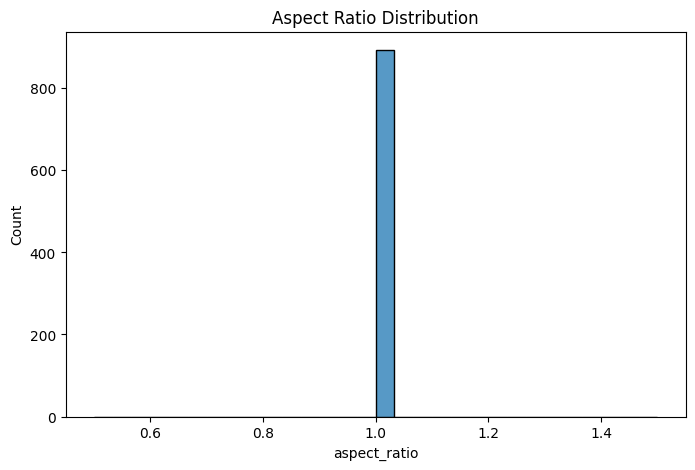

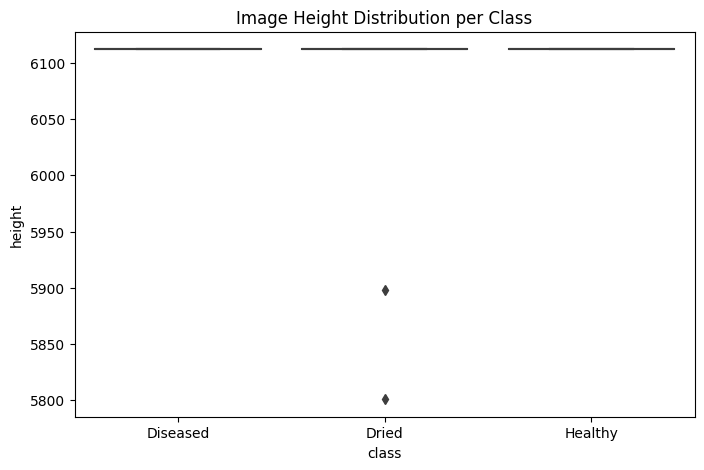

Computing RGB/HSV stats: 100%|██████████| 20/20 [00:28<00:00,  1.45s/it]



RGB/HSV mean/std summary:
           R_mean      R_std      G_mean      G_std      B_mean      B_std  \
count   20.000000  20.000000   20.000000  20.000000   20.000000  20.000000   
mean   158.223602  60.500712  166.787008  37.458642  163.011909  41.771130   
std      8.296913   7.185983    7.285863  11.869491    7.006443   8.167971   
min    142.968054  43.435114  145.645051  17.860924  145.667454  24.750282   
25%    153.833568  56.442079  163.837845  29.761833  159.615000  39.147868   
50%    158.466304  60.596207  167.415784  34.063269  162.417403  40.962408   
75%    160.476589  64.240123  172.632145  46.514551  166.925191  46.126167   
max    173.622374  73.600806  176.920709  59.265041  174.220334  56.912105   

           H_mean     S_mean      V_mean  
count   20.000000  20.000000   20.000000  
mean    93.792637  35.354346  170.203615  
std      6.839521   9.252077    6.698205  
min     74.255337  17.503272  150.926033  
25%     91.032063  30.047899  165.949832  
50%     95.4

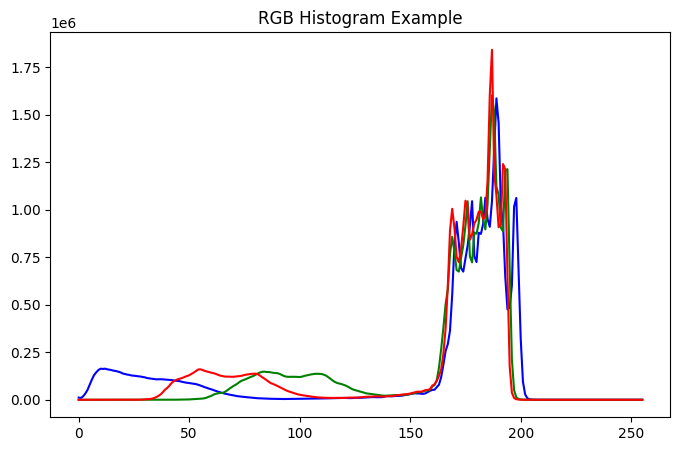

Brightness/Contrast: 100%|██████████| 20/20 [00:12<00:00,  1.54it/s]



Brightness mean/std (subset): [164.65112204  41.22281756]


Sharpness: 100%|██████████| 893/893 [11:45<00:00,  1.27it/s]


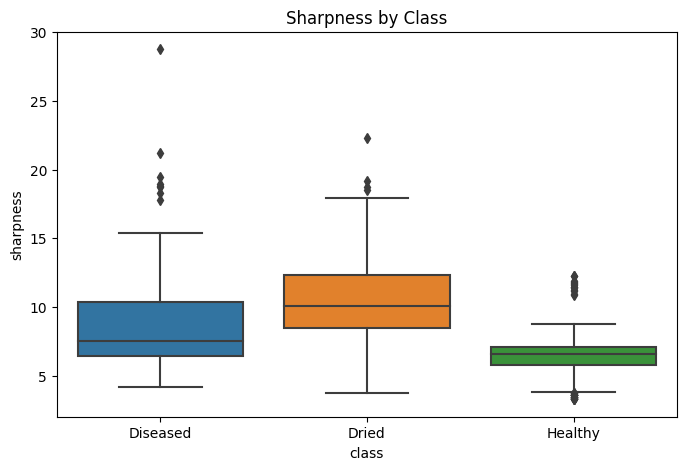

Gray-World Check: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]



Channel means (BGR): [158.22360172 166.78700776 163.01190929]


Checking duplicates: 100%|██████████| 893/893 [08:14<00:00,  1.80it/s]


Found 3 potential duplicates.
Duplicate pair: ('/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_040.jpg', '/kaggle/input/betel/Controlled Environment/Diseased/CE_Diseased_Leaf_058.jpg')
Duplicate pair: ('/kaggle/input/betel/Controlled Environment/Healthy/CE_Healthy_Leaf_294.jpg', '/kaggle/input/betel/Controlled Environment/Healthy/CE_Healthy_Leaf_293.jpg')
Duplicate pair: ('/kaggle/input/betel/Controlled Environment/Healthy/CE_Healthy_Leaf_250.jpg', '/kaggle/input/betel/Controlled Environment/Healthy/CE_Healthy_Leaf_330.jpg')


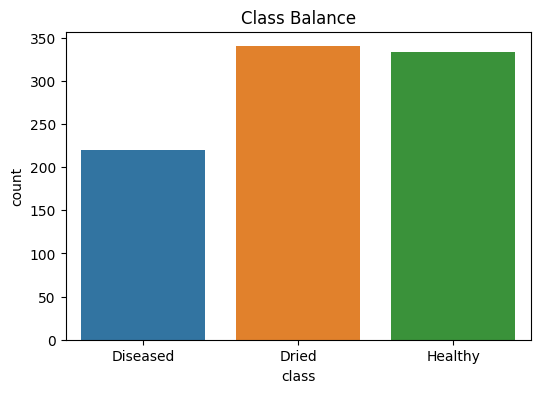


Train: 714 | Test: 179


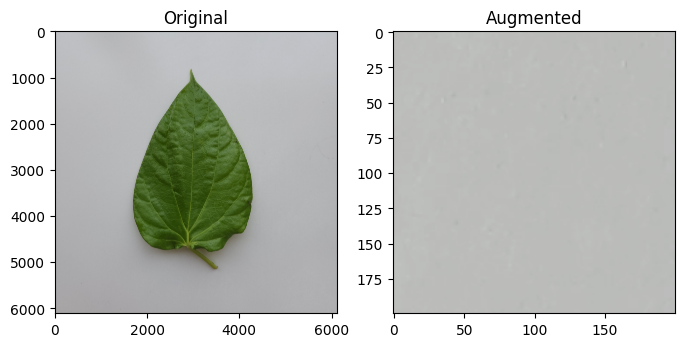

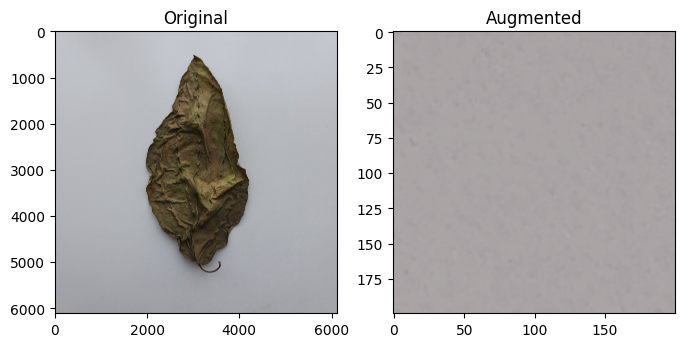

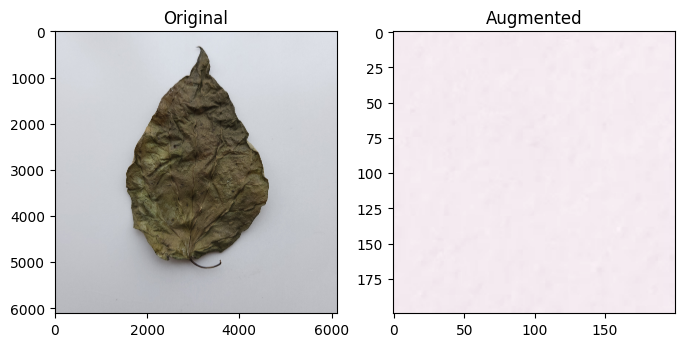


✅ EDA complete — all key outputs displayed.


In [2]:
# ===============================
# CSE475 (Fall 2025) - Task 1: EDA
# Dataset: Betel Leaf Dataset (btdym2t6mt/1)
# Author: <Your Name>
# ===============================

import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
from PIL import Image
import imagehash
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ---- CONFIG ----
base_path = "/kaggle/input/betel/Controlled Environment"  # change if different
classes = os.listdir(base_path)
print("Classes found:", classes)

# ===============================
# 1. Load basic dataset info
# ===============================
data = []
for cls in classes:
    folder = os.path.join(base_path, cls)
    for f in os.listdir(folder):
        path = os.path.join(folder, f)
        img = cv2.imread(path)
        if img is not None:
            h, w, c = img.shape
            data.append([path, cls, h, w])

df = pd.DataFrame(data, columns=["path", "class", "height", "width"])
print("\nSample entries:")
print(df.head())
print("\nClass distribution:")
print(df["class"].value_counts())

# ===============================
# 2. Resolution and Aspect Ratio
# ===============================
df["aspect_ratio"] = df["width"] / df["height"]
plt.figure(figsize=(8,5))
sns.histplot(df["aspect_ratio"], bins=30)
plt.title("Aspect Ratio Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="class", y="height", data=df)
plt.title("Image Height Distribution per Class")
plt.show()

# ===============================
# 3. RGB & HSV Statistics
# ===============================
def color_stats(img):
    stats = {}
    for i, ch in enumerate(["R","G","B"]):
        stats[ch+"_mean"] = np.mean(img[:,:,i])
        stats[ch+"_std"] = np.std(img[:,:,i])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    stats["H_mean"] = np.mean(hsv[:,:,0])
    stats["S_mean"] = np.mean(hsv[:,:,1])
    stats["V_mean"] = np.mean(hsv[:,:,2])
    return stats

subset = df.sample(20, random_state=42)
rgb_stats = []
for p in tqdm(subset["path"], desc="Computing RGB/HSV stats"):
    img = cv2.imread(p)
    rgb_stats.append(color_stats(img))
rgb_df = pd.DataFrame(rgb_stats)
print("\nRGB/HSV mean/std summary:")
print(rgb_df.describe())

# Plot RGB hist for one random sample
sample_img = cv2.imread(subset.iloc[0]["path"])
colors = ('b','g','r')
plt.figure(figsize=(8,5))
for i,col in enumerate(colors):
    histr = cv2.calcHist([sample_img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
plt.title("RGB Histogram Example")
plt.show()

# ===============================
# 4. Brightness/Contrast Spread
# ===============================
def brightness_contrast(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray.mean(), gray.std()

br_ct = []
for p in tqdm(subset["path"], desc="Brightness/Contrast"):
    img = cv2.imread(p)
    br_ct.append(brightness_contrast(img))
br_ct = np.array(br_ct)
print("\nBrightness mean/std (subset):", br_ct.mean(axis=0))

# ===============================
# 5. Sharpness/Noise Proxy (Laplacian)
# ===============================
def sharpness(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

df["sharpness"] = [sharpness(cv2.imread(p)) for p in tqdm(df["path"], desc="Sharpness")]
plt.figure(figsize=(8,5))
sns.boxplot(x="class", y="sharpness", data=df)
plt.title("Sharpness by Class")
plt.show()

# ===============================
# 6. White Balance (Gray-World)
# ===============================
means = []
for p in tqdm(subset["path"], desc="Gray-World Check"):
    img = cv2.imread(p)
    means.append(np.mean(img, axis=(0,1)))
means = np.array(means)
print("\nChannel means (BGR):", means.mean(axis=0))

# ===============================
# 7. Duplicate Detection (Perceptual Hash)
# ===============================
hashes = {}
dupes = []
for p in tqdm(df["path"], desc="Checking duplicates"):
    try:
        h = imagehash.phash(Image.open(p))
        if h in hashes:
            dupes.append((p, hashes[h]))
        else:
            hashes[h] = p
    except:
        pass

print(f"\nFound {len(dupes)} potential duplicates.")
if dupes:
    for d in dupes[:5]:
        print("Duplicate pair:", d)

# ===============================
# 8. Class Balance Plot
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df)
plt.title("Class Balance")
plt.show()

# ===============================
# 9. Train-Test Split (Leakage Safeguard)
# ===============================
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["class"], random_state=42)
print(f"\nTrain: {len(train_df)} | Test: {len(test_df)}")

# ===============================
# 10. Augmentation Probe
# ===============================
transform = A.Compose([
    A.RandomCrop(height=200, width=200),
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(p=0.5),
    A.GaussianBlur(p=0.3),
    ToTensorV2()
])

sample_paths = list(subset["path"].values)[:3]
for p in sample_paths:
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    augmented = transform(image=img)["image"].permute(1,2,0).numpy()
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(img); plt.title("Original")
    plt.subplot(1,2,2); plt.imshow(augmented); plt.title("Augmented")
    plt.show()

print("\n✅ EDA complete — all key outputs displayed.")


In [5]:
# Step 1: Setup & Imports
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Set dataset path (update if needed)
data_dir = "/kaggle/input/betel/Controlled Environment"  # change this to your extracted folder
resized_dir = "/content/resized_images"  # new folder for resized images
os.makedirs(resized_dir, exist_ok=True)


In [6]:
import shutil

# Step 2: Resize images to 224x224 and save in a new folder

img_height, img_width = 224, 224

for root, dirs, files in os.walk(data_dir):
    for file in tqdm(files):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            class_name = os.path.basename(root)
            class_dir = os.path.join(resized_dir, class_name)
            os.makedirs(class_dir, exist_ok=True)

            img_path = os.path.join(root, file)
            save_path = os.path.join(class_dir, file)

            try:
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.resize(img, (img_width, img_height))
                cv2.imwrite(save_path, img)
            except Exception as e:
                print(f"Error with {img_path}: {e}")

print("✅ All images resized to 224x224 and saved in:", resized_dir)


0it [00:00, ?it/s]
100%|██████████| 333/333 [02:18<00:00,  2.41it/s]

✅ All images resized to 224x224 and saved in: /content/resized_images


In [7]:
# Step 3: Create a CSV file with image paths and labels

image_paths = []
labels = []

for class_name in os.listdir(resized_dir):
    class_folder = os.path.join(resized_dir, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(class_folder, img_file))
                labels.append(class_name)

# Create DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Save to CSV
csv_path = os.path.join(resized_dir, 'dataset.csv')
df.to_csv(csv_path, index=False)

print(f"✅ CSV created successfully at: {csv_path}")
print(df.head())


✅ CSV created successfully at: /content/resized_images/dataset.csv
                                          image_path  label
0  /content/resized_images/Dried/CE_Dried_Leaf_25...  Dried
1  /content/resized_images/Dried/CE_Dried_Leaf_15...  Dried
2  /content/resized_images/Dried/CE_Dried_Leaf_21...  Dried
3  /content/resized_images/Dried/CE_Dried_Leaf_05...  Dried
4  /content/resized_images/Dried/CE_Dried_Leaf_06...  Dried


In [8]:
# Step 4: Load dataset and split into train/test sets

# Read the CSV we created earlier
df = pd.read_csv(csv_path)

# Encode labels as integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_encoded'])

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in tqdm(image_paths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0  # normalize
        images.append(img)
    return np.array(images)

# Load the actual image data
X_train = load_images(train_df['image_path'])
X_test = load_images(test_df['image_path'])
y_train = to_categorical(train_df['label_encoded'])
y_test = to_categorical(test_df['label_encoded'])

print("✅ Data loaded successfully!")
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)
print("Number of classes:", y_train.shape[1])


100%|██████████| 179/179 [00:00<00:00, 586.95it/s]


✅ Data loaded successfully!
Training samples: (714, 224, 224, 3)
Testing samples: (179, 224, 224, 3)
Number of classes: 3


In [15]:
# ================================
# Step 1: Import Libraries
# ================================
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# ================================
# Step 2: Dataset Path (Kaggle)
# ================================
dataset_path = "/kaggle/input/betel/Controlled Environment"

# ================================
# Step 3: Create CSV (image paths + labels)
# ================================
data = []
for label_name in os.listdir(dataset_path):
    label_folder = os.path.join(dataset_path, label_name)
    if os.path.isdir(label_folder):
        for img_name in os.listdir(label_folder):
            img_path = os.path.join(label_folder, img_name)
            if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append([img_path, label_name])

df = pd.DataFrame(data, columns=["image_path", "label"])
df.to_csv("/kaggle/working/dataset.csv", index=False)
print("✅ CSV created with", len(df), "images")

# ================================
# Step 4: Resize all images to 224x224
# ================================
IMG_SIZE = 224

def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    return img

X = np.array([load_and_preprocess_image(path) for path in df["image_path"]])
y_labels = df["label"].astype('category').cat.codes
y = to_categorical(y_labels)
label_names = df["label"].astype('category').cat.categories

print("✅ All images resized to 224x224.")
print("Total classes:", len(np.unique(y_labels)))

# ================================
# Step 5: CNN Model Definition
# ================================
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ================================
# Step 6: Custom Metrics Callback
# ================================
class MetricsCallback(Callback):
    def __init__(self, X_test, y_test):
        super().__init__()
        self.X_test = X_test
        self.y_test = np.argmax(y_test, axis=1)
        self.epoch_metrics = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = np.argmax(self.model.predict(self.X_test, verbose=0), axis=1)
        acc = accuracy_score(self.y_test, y_pred)
        prec = precision_score(self.y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(self.y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(self.y_test, y_pred, average='weighted', zero_division=0)
        self.epoch_metrics.append({
            'epoch': epoch+1,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1_score': f1
        })
        print(f"Epoch {epoch+1}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

# ================================
# Step 7: Train for 9 Ratios (each 20 epochs)
# ================================
ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
all_results = []

for ratio in ratios:
    print(f"\n==============================")
    print(f" Training with Test Ratio: {ratio}")
    print(f"==============================")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ratio, random_state=42, stratify=y_labels
    )

    model = build_cnn_model((IMG_SIZE, IMG_SIZE, 3), y.shape[1])
    metrics_cb = MetricsCallback(X_test, y_test)

    model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        verbose=1,
        callbacks=[metrics_cb]
    )

    for m in metrics_cb.epoch_metrics:
        all_results.append({
            'test_ratio': ratio,
            'epoch': m['epoch'],
            'accuracy': m['accuracy'],
            'precision': m['precision'],
            'recall': m['recall'],
            'f1_score': m['f1_score']
        })

# ================================
# Step 8: Save Results
# ================================
results_df = pd.DataFrame(all_results)
results_df.to_csv("/kaggle/working/cnn_results_detailed.csv", index=False)
print("\n✅ Saved detailed metrics to cnn_results_detailed.csv")

summary = results_df.groupby('test_ratio')[['accuracy','precision','recall','f1_score']].mean().reset_index()
print("\n📊 Average metrics per ratio:")
print(summary)


✅ CSV created with 893 images
✅ All images resized to 224x224.
Total classes: 3

 Training with Test Ratio: 0.1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4849 - loss: 4.0235Epoch 1: Acc=0.8000, Prec=0.7983, Rec=0.8000, F1=0.7757
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4896 - loss: 3.9511
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8262 - loss: 0.4322Epoch 2: Acc=0.8222, Prec=0.8791, Rec=0.8222, F1=0.7884
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8262 - loss: 0.4311
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8691 - loss: 0.3257Epoch 3: Acc=0.9333, Prec=0.9356, Rec=0.9333, F1=0.9338
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8697 - loss: 0.3244
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8972 - loss: 0.2448Epoch 4: Acc=0.8667, Prec=0.8852, Rec=0.8667, F1=0.8556
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8976 - loss: 0.2445
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8968 - loss: 0.2412Epoch 5: Acc=0.9111, Prec=0.9110, Rec=0.9111, F1=0.9084
26/26 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3949 - loss: 4.9899Epoch 1: Acc=0.6089, Prec=0.4489, Rec=0.6089, F1=0.5008
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.3993 - loss: 4.8917
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7455 - loss: 0.5414Epoch 2: Acc=0.7877, Prec=0.7838, Rec=0.7877, F1=0.7586
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7457 - loss: 0.5410
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7948 - loss: 0.4716Epoch 3: Acc=0.7989, Prec=0.7974, Rec=0.7989, F1=0.7980
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7953 - loss: 0.4707
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8493 - loss: 0.3656Epoch 4: Acc=0.8324, Prec=0.8314, Rec=0.8324, F1=0.8261
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8491 - loss: 0.3661
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8535 - loss: 0.3875Epoch 5: Acc=0.8380, Prec=0.8643, Rec=0.8380, F1=0.8186
23/23 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4567 - loss: 4.2802Epoch 1: Acc=0.7948, Prec=0.8032, Rec=0.7948, F1=0.7956
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4609 - loss: 4.1867
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7735 - loss: 0.4765Epoch 2: Acc=0.8134, Prec=0.8807, Rec=0.8134, F1=0.8137
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7748 - loss: 0.4756
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8241 - loss: 0.4515Epoch 3: Acc=0.8134, Prec=0.8075, Rec=0.8134, F1=0.8100
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8249 - loss: 0.4501
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8758 - loss: 0.3327Epoch 4: Acc=0.8321, Prec=0.8788, Rec=0.8321, F1=0.8023
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8765 - loss: 0.3322
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9055 - loss: 0.2952Epoch 5: Acc=0.8955, Prec=0.9034, Rec=0.8955, F1=0.8892
20/20 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4337 - loss: 4.4052Epoch 1: Acc=0.7654, Prec=0.7506, Rec=0.7654, F1=0.7117
17/17 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.4406 - loss: 4.2961
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7939 - loss: 0.5028Epoch 2: Acc=0.8073, Prec=0.7998, Rec=0.8073, F1=0.7936
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7933 - loss: 0.5029
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8186 - loss: 0.4691Epoch 3: Acc=0.8240, Prec=0.8243, Rec=0.8240, F1=0.8240
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8194 - loss: 0.4662
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8624 - loss: 0.4133Epoch 4: Acc=0.8073, Prec=0.8207, Rec=0.8073, F1=0.7807
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8620 - loss: 0.4146
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8755 - loss: 0.2865Epoch 5: Acc=0.8799, Prec=0.8827, Rec=0.8799, F1=0.8752
17/17 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3904 - loss: 5.3982Epoch 1: Acc=0.7606, Prec=0.7786, Rec=0.7606, F1=0.7656
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3968 - loss: 5.2583
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7368 - loss: 0.6143Epoch 2: Acc=0.7539, Prec=0.7583, Rec=0.7539, F1=0.7491
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7360 - loss: 0.6141
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7689 - loss: 0.5315Epoch 3: Acc=0.8009, Prec=0.8025, Rec=0.8009, F1=0.7705
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7709 - loss: 0.5285
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7982 - loss: 0.4756Epoch 4: Acc=0.8054, Prec=0.7968, Rec=0.8054, F1=0.8001
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8002 - loss: 0.4713
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8570 - loss: 0.3656Epoch 5: Acc=0.8076, Prec=0.8227, Rec=0.8076, F1=0.8078
14/14 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3357 - loss: 6.2984Epoch 1: Acc=0.7929, Prec=0.7980, Rec=0.7929, F1=0.7950
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3394 - loss: 6.1367
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6903 - loss: 0.8222Epoch 2: Acc=0.7612, Prec=0.8401, Rec=0.7612, F1=0.6728
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6923 - loss: 0.8160
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7973 - loss: 0.5220Epoch 3: Acc=0.8172, Prec=0.8219, Rec=0.8172, F1=0.8170
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7987 - loss: 0.5199
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8491 - loss: 0.3992Epoch 4: Acc=0.8172, Prec=0.8251, Rec=0.8172, F1=0.8187
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8485 - loss: 0.3983
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8428 - loss: 0.3558Epoch 5: Acc=0.8470, Prec=0.8597, Rec=0.8470, F1=0.8302
12/12 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4004 - loss: 6.2952Epoch 1: Acc=0.7460, Prec=0.5911, Rec=0.7460, F1=0.6513
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.4015 - loss: 6.1899
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6531 - loss: 0.7836Epoch 2: Acc=0.7572, Prec=0.8152, Rec=0.7572, F1=0.6787
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6522 - loss: 0.7796
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7757 - loss: 0.5373Epoch 3: Acc=0.8307, Prec=0.8299, Rec=0.8307, F1=0.8172
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7734 - loss: 0.5388
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7588 - loss: 0.4630Epoch 4: Acc=0.7875, Prec=0.8165, Rec=0.7875, F1=0.7493
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7605 - loss: 0.4627
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8134 - loss: 0.4369Epoch 5: Acc=0.8227, Prec=0.8319, Rec=0.8227, F1=0.8231
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3463 - loss: 3.9322Epoch 1: Acc=0.4168, Prec=0.2860, Rec=0.4168, F1=0.2775
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.3474 - loss: 3.9846
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5684 - loss: 0.9363Epoch 2: Acc=0.7510, Prec=0.5895, Rec=0.7510, F1=0.6539
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5754 - loss: 0.9265
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7156 - loss: 0.6180Epoch 3: Acc=0.7748, Prec=0.7959, Rec=0.7748, F1=0.7775
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.7209 - loss: 0.6080
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7584 - loss: 0.4709Epoch 4: Acc=0.7986, Prec=0.7934, Rec=0.7986, F1=0.7948
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.7648 - loss: 0.4640
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7900 - loss: 0.4156Epoch 5: Acc=0.7776, Prec=0.7811, Rec=0.7776, F1=0.7647
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3088 - loss: 6.0401Epoch 1: Acc=0.3731, Prec=0.1392, Rec=0.3731, F1=0.2028
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.3187 - loss: 6.6550
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3355 - loss: 4.7130Epoch 2: Acc=0.3806, Prec=0.1449, Rec=0.3806, F1=0.2098
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.3275 - loss: 4.5679
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4096 - loss: 1.5131Epoch 3: Acc=0.7711, Prec=0.8149, Rec=0.7711, F1=0.7010
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.4308 - loss: 1.4746
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7845 - loss: 0.8737Epoch 4: Acc=0.7799, Prec=0.7829, Rec=0.7799, F1=0.7793
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.7822 - loss: 0.8610
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7382 - loss: 0.6009Epoch 5: Acc=0.8022, Prec=0.8011, Rec=0.8022, F1=0.7826
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step